In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import filt_freq, RMS

Данные загружены


In [2]:
def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    #ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона


In [33]:
fs, data_0605_91_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0091S2.wav')
fs, data_0605_92_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0092S2.wav')
fs, data_0605_93_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0093S2.wav')
fs, data_0605_94_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0094S2.wav')
fs, data_0605_95_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0095S2.wav')
fs, data_0605_96_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0096S2.wav')
fs, data_0605_97_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0097S2.wav')
fs, data_0605_98_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0098S2.wav')
fs, data_0605_99_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0099S2.wav')
fs, data_0605_100_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0100S2.wav')
fs, data_0605_101_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0101S2.wav')
fs, data_0605_102_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0102S2.wav')
fs, data_0605_103_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0103S2.wav')

data_0605_2 = [data_0605_91_2, data_0605_92_2, data_0605_93_2, data_0605_94_2, data_0605_95_2, data_0605_96_2, data_0605_97_2, data_0605_98_2, data_0605_99_2, data_0605_100_2, data_0605_101_2, data_0605_102_2, data_0605_103_2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


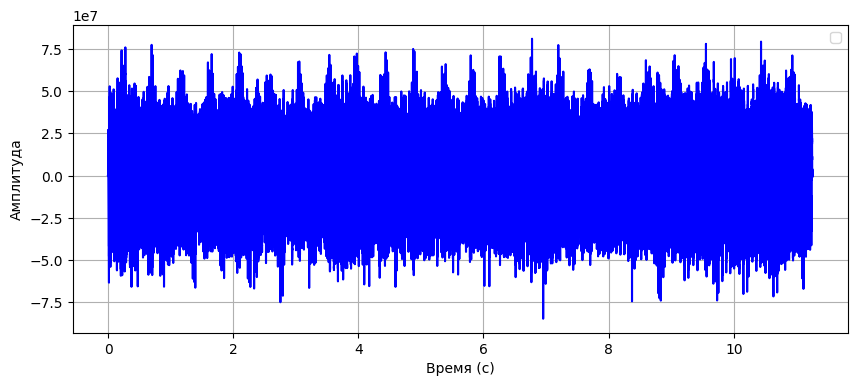

In [34]:
j = 6
t = np.arange(len(data_0605_2[j]))/fs
f = fftfreq(len(data_0605_2[j]), 1 / fs)
plt.figure(figsize=(10,4))
plt.plot(t, data_0605_2[j], color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [36]:
data_rotation = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    
    RMS_degrees = []

    for i in range(len(data_0605_2)):
        data_rotation_filt = ifft(filt_freq(fft(data_0605_2[i]), f1, f2, fs))
        RMS_value = RMS(data_rotation_filt, f1, f2, fs)
        RMS_degrees.append(RMS_value)

    data_rotation.append(RMS_degrees)

print("RMS_array", data_rotation)

# t_index = (t > 25) & (t < 63)
# t_rotation = t[t_index]
# data_rotation = data_0605_104_2[t_index]/max(data_0605_104_2[t_index])
# f_rotation = fftfreq(int(len(data_rotation)), 1 / fs)

# data_rotation_octaves = []
# for f1, f2 in zip(lower_bounds, upper_bounds):
#     data_rotation_filt_f = ifft(filt_freq(fft(data_rotation), f1, f2))
    
#     # Применяем преобразование Гильберта
#     analytic_signal = hilbert(np.real(data_rotation_filt_f))
#     envelope = np.abs(analytic_signal)  # Огибающая

#     data_rotation_octaves.append(envelope)

# data_rotation_octaves = np.array(data_rotation_octaves)

# data_rotation_filt = ifft(filt_freq(fft(data_rotation), 281, 355))

# f_ = fftfreq(int(len(data_rotation_filt )), 1 / fs)

# plt.figure(figsize=(10,4))
# plt.plot(t_rotation, data_rotation, color='blue')
# plt.legend()
# plt.xlabel("Время (с)")
# plt.ylabel("Амплитуда")
# plt.grid(True)
# plt.show()

RMS_array [[471618217.87738067, 330130874.40268487, 321899055.2561962, 335005446.1264413, 359214164.8242744, 356934735.7304282, 332397802.5729121, 335838332.73632884, 338456292.81652325, 347034262.5148526, 361101150.968171, 337993625.96374834, 316985890.3194053], [978186909.6609657, 538839249.1736934, 424968567.42802906, 352918763.0454262, 325680316.03694123, 317773377.1108362, 328719726.78501236, 329241774.71143407, 365287126.3071269, 392761511.66791403, 395823299.9846779, 383394977.9286888, 361340413.63243324], [468242056.11788845, 292932986.3648842, 244993328.34505656, 233429171.79747257, 254742739.5482425, 262792086.60153824, 211143769.98029575, 238569146.9307121, 271220184.29643047, 302437317.1912058, 329640569.9770977, 365986770.03407127, 345156679.4154426], [1133546332.1772609, 682582587.1832622, 629747212.2902567, 661062232.5940313, 690894256.6820282, 673700260.7977552, 612764856.6994765, 607008325.8695728, 475332279.0556017, 549733979.1486515, 544723002.3148723, 625961737.8515

In [ ]:
j = 10
amplitude = []
for i in range(len(data_rotation)):
    original_array = np.array(data_rotation[i])  # Исходный массив
    original_array = original_array/max(original_array)  # Нормируем массив
    reversed_array = original_array[::-1]  # Создаем обратную копию массива
    result_array = np.concatenate((original_array, reversed_array))
    analytic_signal = hilbert(np.real(result_array))
    envelope = np.abs(analytic_signal)  # Огибающая
    amplitude.append(envelope)
    
angles = np.linspace(0, 2 * np.pi, len(amplitude[0]))  # Углы в радианах
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, np.abs(amplitude[10]), linewidth=2, label = "800 Гц")
ax.plot(angles, np.abs(amplitude[11]), linewidth=2, label = "1000 Гц")
ax.plot(angles, np.abs(amplitude[12]), linewidth=2, label = "1250 Гц")
ax.plot(angles, np.abs(amplitude[13]), linewidth=2, label = "1600 Гц")  
ax.plot(angles, np.abs(amplitude[14]), linewidth=2, label = "2000 Гц")
  
ax.set_title("Диаграмма направленности датчика")
plt.legend()
plt.show()

In [3]:
amp_standard_23 = np.array([55, 53, 53, 54, 55, 55, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([12.5, 12, 11, 10, 9, 8.5, 7.5, 6.5, 5, 4.5, 4, 4.5, 3.5, 3, 3, 3, 2.5, 2.5, 2.5, 2, 2, 1])

fs, data_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0039S1.wav')
fs, data_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0039S2.wav')

fs, data_calibrated = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0038S1.wav')
fs, data_105_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0105S1.wav')

fs, data_105_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0105S2.wav')
fs, data_107_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0107S1.wav')

fs, data_84_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0084S1.wav')
fs, data_84_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0084S2.wav')

In [38]:
data_f = fft(data_1)
sample_rate = fs
f_filt_min = 80
f_filt_max = 120
l = len(data_f)

f_1 = fftfreq(int(l), 1 / sample_rate)

# plot1_f(f, data_f, 'Спектр до', 10000, 'f, Гц')

array_f = np.zeros(l)
f_int_1 = (np.abs(f_1) > f_filt_min) & (np.abs(f_1) < f_filt_max)
array_f[f_int_1] = data_f[f_int_1]



/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_40478/3644816005.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


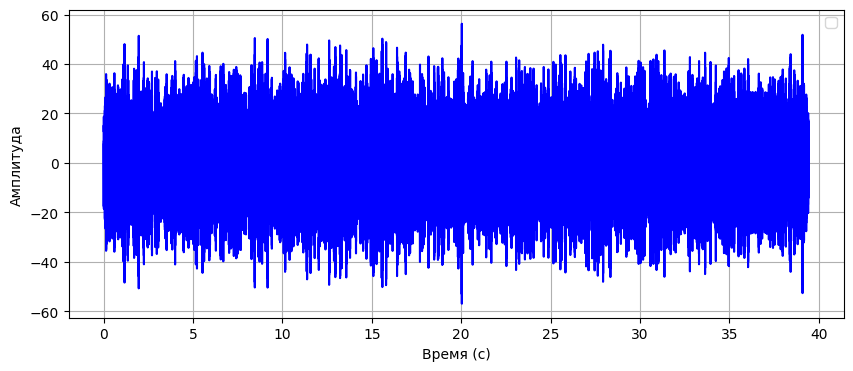

In [ ]:
data = data_1
data_1_f = fft(data)
data_1_f_filt = filt_freq(fft(data), 355, 447, fs)
data_1_filt = ifft(data_1_f_filt)

t = np.arange(len(data))/fs
f = fftfreq(len(data), 1 / fs)

plt.figure(figsize=(10,4))
plt.plot(t, data_1_filt, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

Оценить среднее значение амплитуды синуса, и получая коэффициент на который делим все значения и умножаем на 100 и получаем мВ

In [4]:
koefficient = 6.77e7 / 100

data_calibrated = np.array(data_calibrated) / koefficient
data_1 = data_1 / koefficient
data_84_1 = data_84_1 / koefficient
data_105_1 = data_105_1 / koefficient

In [5]:
t = np.arange(len(data_calibrated))/fs

t_index = (t > 8) & (t < 15)
t_rotation = t[t_index]
f_rotation = fftfreq(int(len(data_calibrated)), 1 / fs)
data_calibrated = data_calibrated[t_index]
data_calibrated_filt = ifft(filt_freq(fft(data_calibrated), 995, 1005, fs))

In [6]:
ampl_calibr = RMS(data_calibrated_filt, 995, 1005, fs)
k = 2e-5 * 10**((94-70)/20) / ampl_calibr
print(k)

1.42090138416594e-09


In [7]:
data_1_calibrated = data_1 * k

amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_1_calibrated, f1, f2, fs)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_2, f1, f2, fs)
    amplitudes_PGD.append(amp)


amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)

l_39 = amplitudes_microphone / amplitudes_PGD


In [8]:
data_1_calibrated = data_84_1 * k

amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_1_calibrated, f1, f2, fs)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_84_2, f1, f2, fs)
    amplitudes_PGD.append(amp)


amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)

l_84 = amplitudes_microphone / amplitudes_PGD


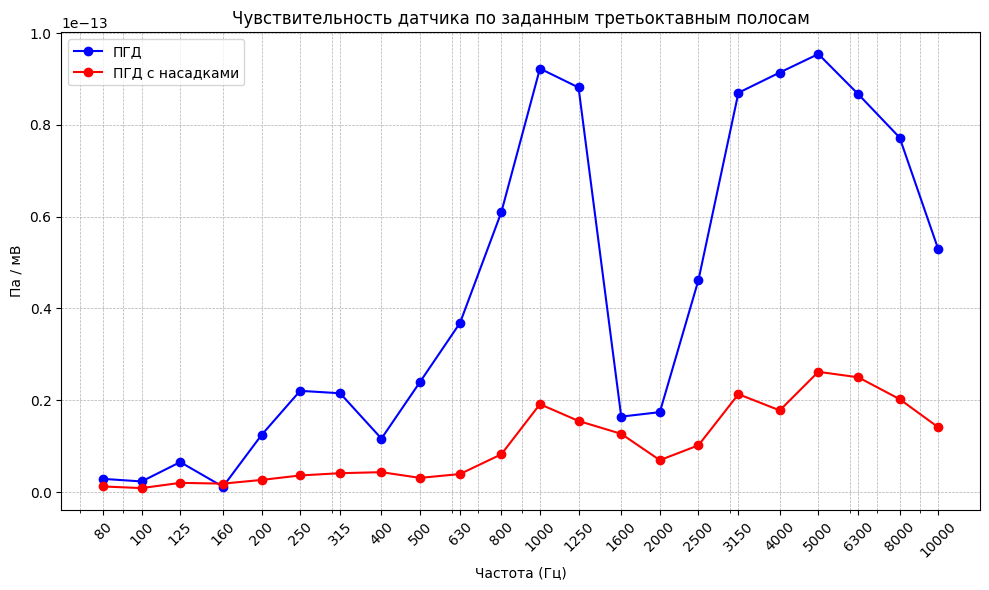

In [9]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, l_39, marker='o', color='blue', label='ПГД')
plt.semilogx(center_freqs, l_84, marker='o', color='red', label='ПГД с насадками')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Па / мВ')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()